In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
train=pd.read_excel("../data/raw/train.xlsx").drop(columns=["date"],errors="ignore")
print("Train samples:",len(train))
print("Columns:",train.columns.tolist())

Train samples: 16209
Columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


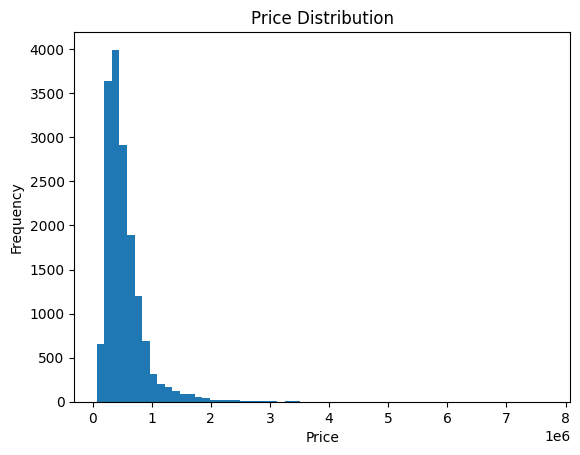

In [3]:
plt.hist(train["price"],bins=60)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [4]:
print("Price summary:\n",train["price"].describe())
print("\nBedroom counts:\n",train["bedrooms"].value_counts().head())

Price summary:
 count    1.620900e+04
mean     5.374703e+05
std      3.603036e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

Bedroom counts:
 bedrooms
3    7380
4    5128
2    2098
5    1213
6     197
Name: count, dtype: int64


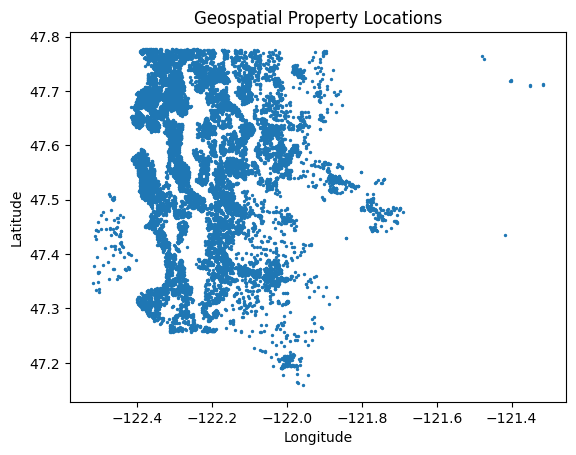

In [5]:
plt.scatter(train["long"],train["lat"],s=2)
plt.title("Geospatial Property Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

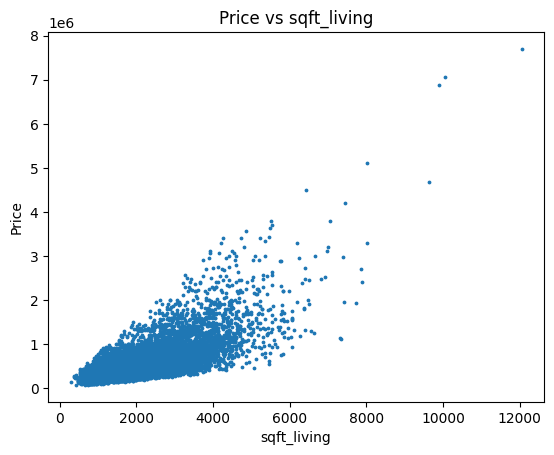

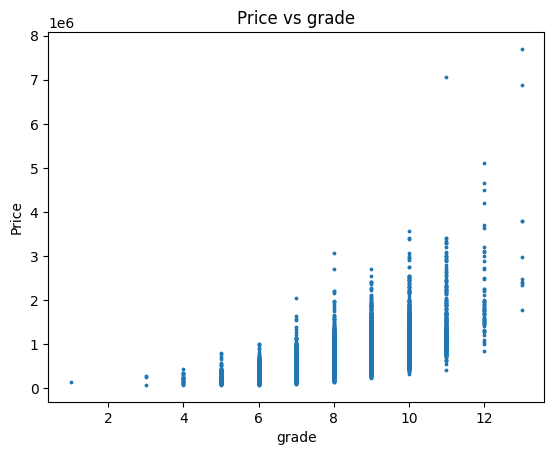

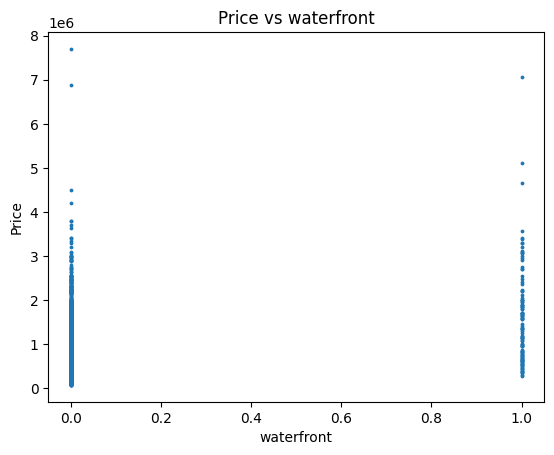

In [6]:
for col in ["sqft_living","grade","waterfront"]:
    if col in train.columns:
        plt.scatter(train[col],train["price"],s=3)
        plt.title(f"Price vs {col}")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()

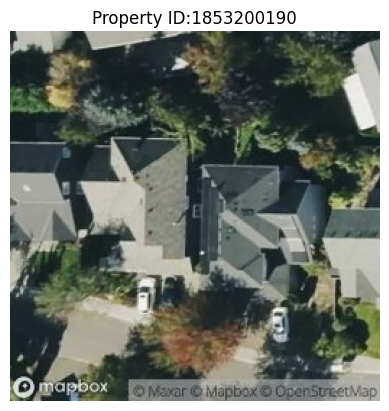

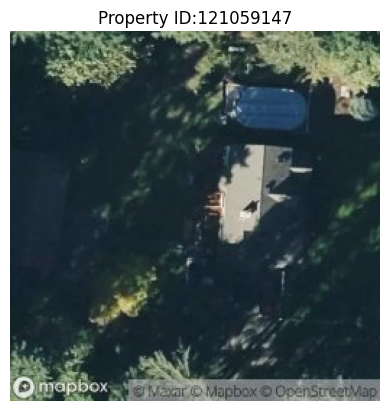

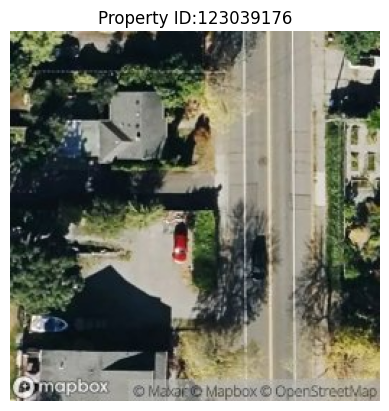

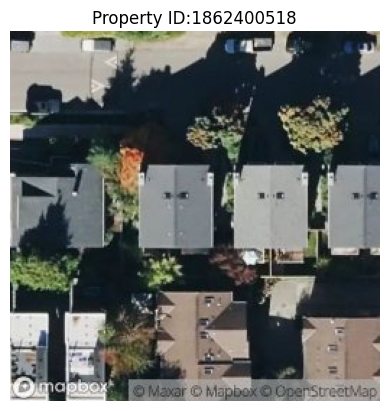

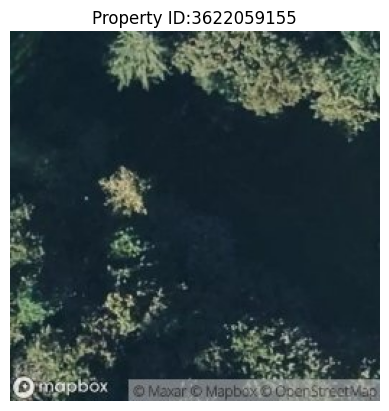

In [7]:
IMG_DIR="../data/images/all"
sample_ids=train["id"].sample(5, random_state=42).tolist()
for pid in sample_ids:
    img_path=os.path.join(IMG_DIR,f"{pid}.png")
    img=cv2.imread(img_path)
    if img is not None:
        img=img[..., ::-1] 
        plt.imshow(img)
        plt.title(f"Property ID:{pid}")
        plt.axis("off")
        plt.show()
    else:
        print("Missing image for ID:",pid)

In [8]:
print("Latitude range:",train["lat"].min(),"→",train["lat"].max())
print("Longitude range:",train["long"].min(),"→",train["long"].max())

Latitude range: 47.1593 → 47.7776
Longitude range: -122.519 → -121.315


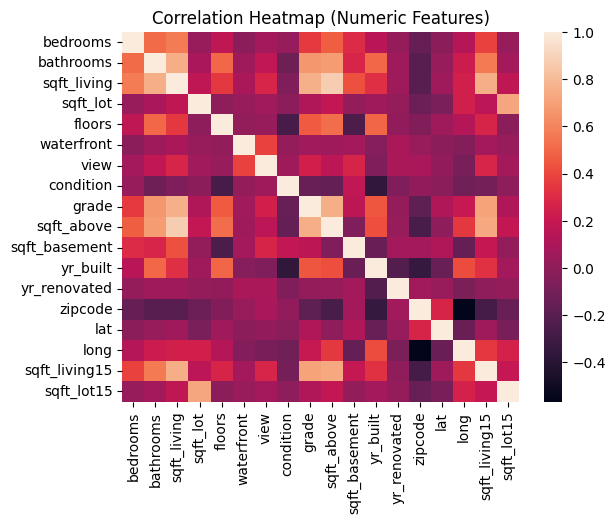

In [9]:
import seaborn as sns
numeric_df=train.select_dtypes("number").drop(columns=["id","price"],errors="ignore")
corr=numeric_df.corr()
plt.figure()
sns.heatmap(corr)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [10]:
if "waterfront" in train.columns:
    wf_price=train.groupby("waterfront")["price"].mean()
    print("\nAverage price by waterfront:\n",wf_price)


Average price by waterfront:
 waterfront
0    5.300675e+05
1    1.591938e+06
Name: price, dtype: float64
